<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/desarrollo/ODD_TP1_Boceto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports y carga del archivo

In [107]:
import pandas as pd
import matplotlib as plt

HOUSING_URL = "/content/drive/MyDrive/UBA /ODD/properati_argentina_2021.csv"
def load_housing_data(housing_url):
    return pd.read_csv(housing_url)

housing = load_housing_data(HOUSING_URL)

## Constantes
#### Se definen constantes y se calculan distancias angulares con el fin de tener una noción del orden de magnitud de las distancias entre provincias, ciudades y comunas de caba  

In [108]:
import requests

# PROVINCIAS ( Datos para tener orden de magnitud )
url_caba = "https://apis.datos.gob.ar/georef/api/provincias?nombre=caba"
url_cordoba = "https://apis.datos.gob.ar/georef/api/provincias?nombre=cordoba"
url_entre_rios = "https://apis.datos.gob.ar/georef/api/provincias?id=30"

caba = requests.get(url_caba).json()
cordoba = requests.get(url_cordoba).json()
entre_rios = requests.get(url_entre_rios).json()

CABA_EXTREMOS= (caba['provincias'][0]['centroide']['lat'], caba['provincias'][0]['centroide']['lon'])
CORDOBA_EXTREMOS= (cordoba['provincias'][0]['centroide']['lat'], cordoba['provincias'][0]['centroide']['lon'])
ENTRE_RIOS_EXTREMOS= (entre_rios['provincias'][0]['centroide']['lat'], entre_rios['provincias'][0]['centroide']['lon'])
TORRE_PUEBLO_EXTREMOS = (-34.406855,-58.729810)
PUENTE_LA_NORIA = (-34.704824600,-58.460649550)
print("UBICACION - LATITUD - LONGITUD - LATITUD A CABA - LONGITUD A CABA")
print("CABA",CABA_EXTREMOS, CABA_EXTREMOS[0] - CABA_EXTREMOS[0], CABA_EXTREMOS[1] - CABA_EXTREMOS[1])
print("CORDOBA",CORDOBA_EXTREMOS, CORDOBA_EXTREMOS[0] - CABA_EXTREMOS[0], CORDOBA_EXTREMOS[1] - CABA_EXTREMOS[1])
print("ENTRE RIOS",ENTRE_RIOS_EXTREMOS, ENTRE_RIOS_EXTREMOS[0] - CABA_EXTREMOS[0], ENTRE_RIOS_EXTREMOS[1] - CABA_EXTREMOS[1])
print("TORRE PUEBLO",TORRE_PUEBLO_EXTREMOS, TORRE_PUEBLO_EXTREMOS[0] - CABA_EXTREMOS[0], TORRE_PUEBLO_EXTREMOS[1] - CABA_EXTREMOS[1])
print("PUENTE LA NORIA",PUENTE_LA_NORIA, PUENTE_LA_NORIA[0] - CABA_EXTREMOS[0], PUENTE_LA_NORIA[1] - CABA_EXTREMOS[1])

UBICACION - LATITUD - LONGITUD - LATITUD A CABA - LONGITUD A CABA
CABA (-34.6144420654301, -58.4458763250916) 0.0 0.0
CORDOBA (-32.1447993873859, -63.801973466573) 2.4696426780441953 -5.356097141481406
ENTRE RIOS (-32.0589278938558, -59.201262616496) 2.555514171574295 -0.755386291404406
TORRE PUEBLO (-34.406855, -58.72981) 0.20758706543009708 -0.28393367490840404
PUENTE LA NORIA (-34.7048246, -58.46064955) -0.09038253456990475 -0.014773224908402938


In [3]:
housing.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


### En el proximo gráfico describimos las caracteristicas tipicas del dataset
#### Es muy llamativo la gran desviación de la latitud y la longitud, considerando que los valores de latitud y longitud varian en una unidad entre ciudades, provincias e incluso países, pero no entre barrios de la Capital
##### Ejemplo
- Latitud y Longitud de CABA: -34.60 , -58,45
- Latitud y Longitud de La Plata, Buenos Aires: -34,92 , -57.95
- Latitud y Longitud de Bahia Blanca, Buenos Aires: -38,71 , -62.27
- Latitud y Longitud de Colonia del Sacramento, Uruguay: -34.46 , -57.84

In [123]:
housing.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


array([[<Axes: title={'center': 'latitud'}>,
        <Axes: title={'center': 'longitud'}>,
        <Axes: title={'center': 'place_l6'}>],
       [<Axes: title={'center': 'property_rooms'}>,
        <Axes: title={'center': 'property_bedrooms'}>,
        <Axes: title={'center': 'property_surface_total'}>],
       [<Axes: title={'center': 'property_surface_covered'}>,
        <Axes: title={'center': 'property_price'}>, <Axes: >]],
      dtype=object)

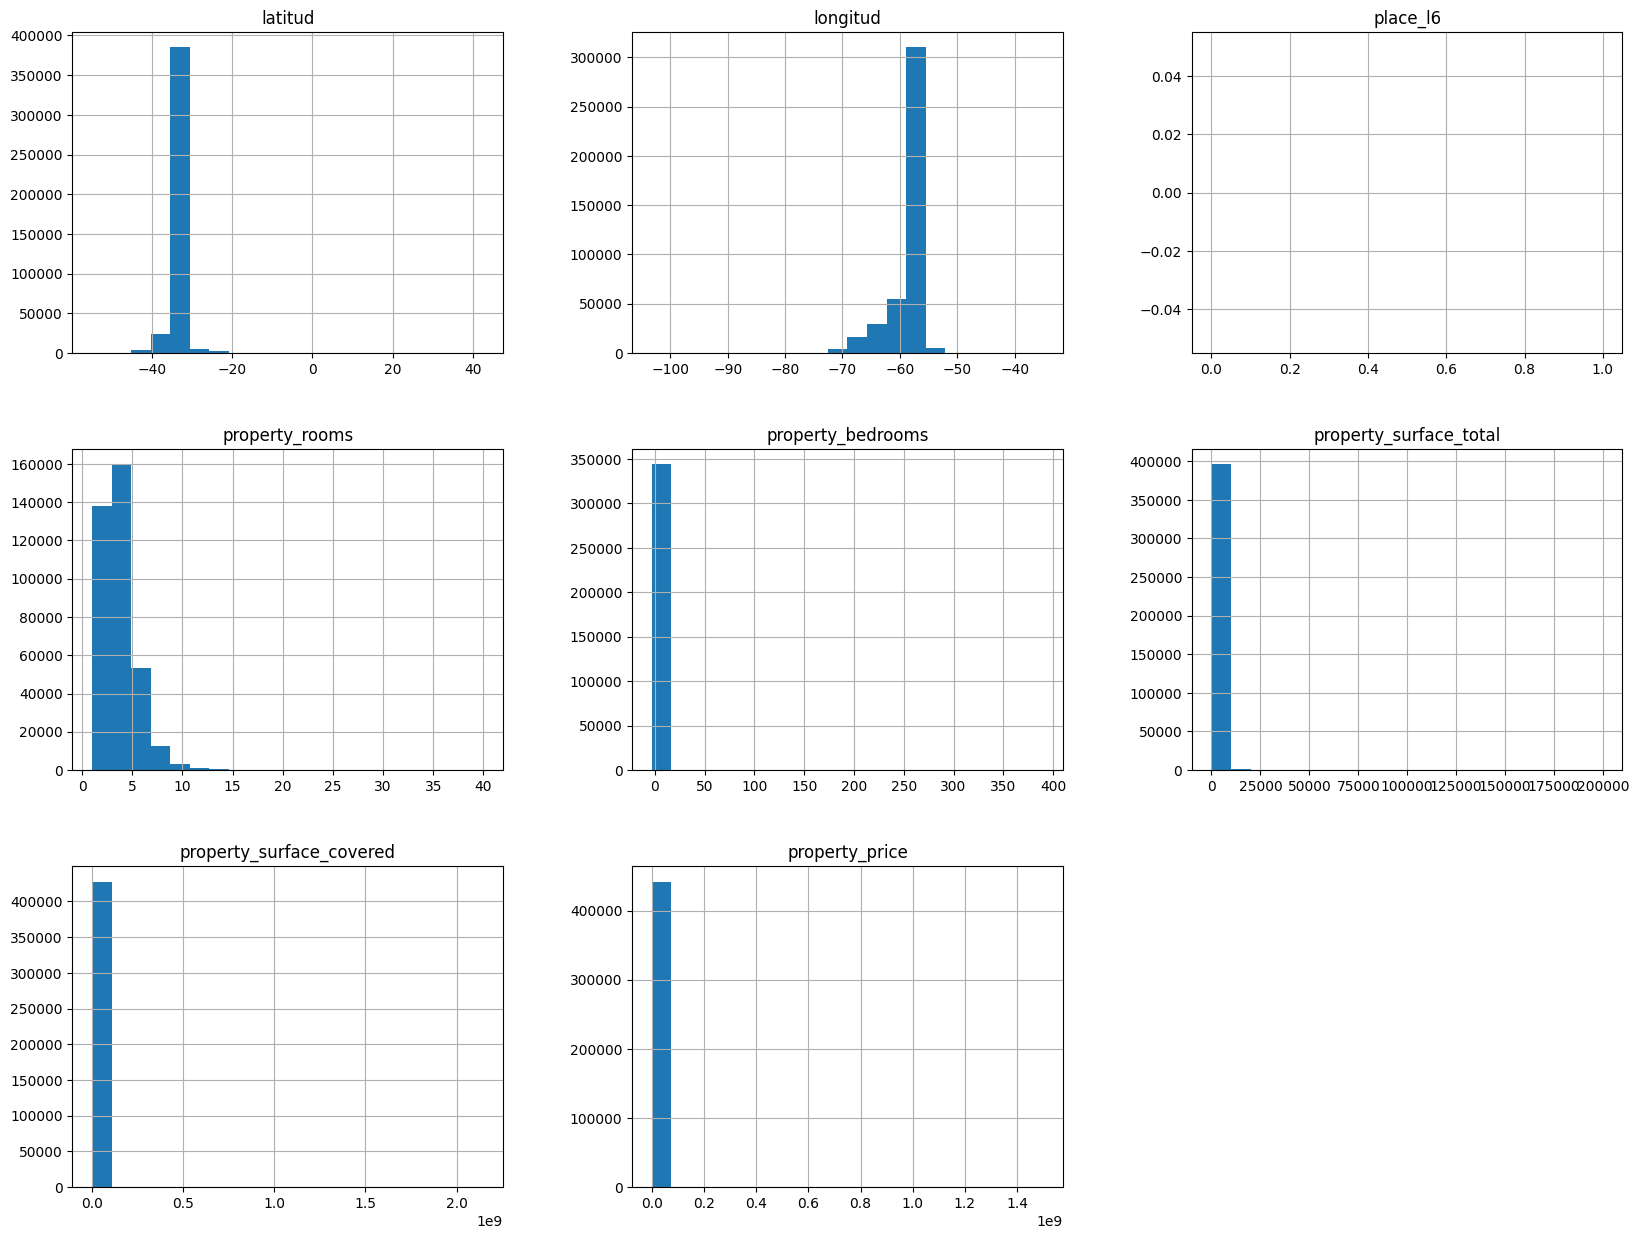

In [124]:
housing.hist(bins=20,figsize=(20,15))

# Secciones y descarte
#### Podemos ver como hay varios datos nulos, debemos analizar si son correctos

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

# CONTENIDO POR SECCIONES
- L2 = Provincia
- L3 = Ciudad
- L4 = Localidad
- L5 = Barrio privado
- L6 = NADA

In [125]:
housing["place_l2"].value_counts()

Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La Pampa                           783
Canelones                          744
Chubut                             701
San Luis                           677
Misiones                           529
Florida                            411
Jujuy                              406
Corrientes               

In [32]:
housing["place_l3"].value_counts()

Rosario              34735
Palermo              25811
Tigre                24327
La Plata             20230
Pilar                15648
                     ...  
Saladas                  1
El Chaltén               1
Paso del Sapo            1
Realicó                  1
Carlos Pellegrini        1
Name: place_l3, Length: 767, dtype: int64

In [31]:
housing["place_l4"].value_counts()

La Plata                       10253
Nordelta                        8637
Olivos                          3976
Ramos Mejía                     3413
Palermo Hollywood               2967
                               ...  
José C Paz                         1
Del Valle                          1
Barrio Cerrado "Las Marías"        1
Cachoeira do Bom Jesus             1
Juan José Paso                     1
Name: place_l4, Length: 791, dtype: int64

In [30]:
housing["place_l5"].value_counts()

BarrioPortezuelo                510
Barrio El Golf                  355
Barrio Los Alisos               314
Barrio Los Lagos                176
Barrio Los Sauces               162
Barrio Los Castores             122
Barrio La Alameda               105
Barrio Cabos del Lago            82
Barrio Lagos del Golf 2          82
Barrio Las Glorietas             77
Barrio Las Caletas               76
Barrio La Isla                   76
Barrio Los Tilos                 72
Islas del Canal                  41
Barrio El Yacht                  40
Barrio Barrancas del Lago        37
QBay Yacht                       31
Enyoi                            27
Barrio Lagos del Golf 1          23
Barrio Residencial Pacheco 2     22
Name: place_l5, dtype: int64

In [29]:
housing["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

# Preprocesamiento: Limpieza

## Eliminar columna vacia ( place_l6 )

In [109]:
housing2 = housing.drop( columns = ["place_l6"])

## Limpieza por desviación estandar
### En el siguiente codigo, se define un nuevo dataset donde los elementos tienen una latitud y longitud tal que se desvia del promedio una cantidad menor a tres veces la std (99.75% de los casos caen dentro de este grupo)
### Este analisis asume que los datos tienen una baja desviación ( OJO )

In [110]:
housing3 = housing2[ abs( housing2.latitud - housing2.latitud.mean() ) < .5* housing2.latitud.std() ]
housing4 = housing3[ abs( housing3.longitud - housing3.longitud.mean() ) <  .5* housing3.latitud.std() ]

housing4.describe()


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,108965.000000,108965.000000,89329.000000,88360.000000,89977.000000,1.040120e+05,1.072380e+05
mean,-34.527606,-58.638911,3.602604,2.539758,446.039343,1.602011e+03,2.530337e+05
std,0.160586,0.130300,1.754392,1.350176,3624.582443,3.463692e+05,1.806240e+06
min,-35.851037,-59.056171,1.000000,-2.000000,10.000000,1.000000e+00,0.000000e+00
25%,-34.617561,-58.712969,2.000000,2.000000,63.000000,5.500000e+01,5.000000e+04
50%,-34.511162,-58.604745,3.000000,2.000000,130.000000,1.050000e+02,1.190000e+05
75%,-34.435886,-58.527614,5.000000,3.000000,270.000000,2.100000e+02,2.300000e+05
max,-32.685384,-58.489352,34.000000,70.000000,200000.000000,1.111111e+08,2.300000e+08


In [111]:
housing4["place_l2"].value_counts()

Bs.As. G.B.A. Zona Norte    66777
Bs.As. G.B.A. Zona Oeste    24621
Capital Federal             12693
Bs.As. G.B.A. Zona Sur       3666
Buenos Aires Interior         817
Entre Ríos                    389
Santa Catarina                  1
California                      1
Name: place_l2, dtype: int64

### MAPA

<Axes: xlabel='latitud', ylabel='longitud'>

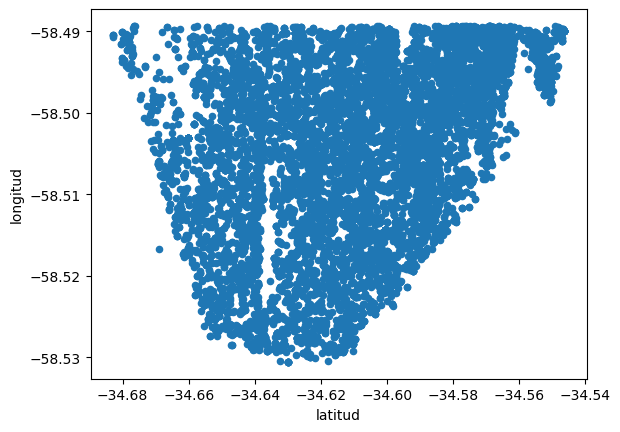

In [112]:
housing5 = housing4[housing4.place_l2 == "Capital Federal"]
housing5[housing5.longitud > -58.75].plot(kind="scatter", x="latitud", y="longitud")

## Limpieza por comparación
### En el siguiente codigo, se define un nuevo dataset donde los elementos tienen una latitud y longitud tal que la distancia al centro de CABA es menor que la distancia de dicho centro a "Torre Pueblo" (Punto de referencia elegido arbitrariamente)

In [121]:
'''
housing6 = housing2[ abs( housing2.latitud - housing2.latitud.mean() ) < abs( CORDOBA_EXTREMOS[0] - CABA_EXTREMOS[0] ) ]
housing7 = housing6[ abs( housing6.longitud - housing6.longitud.mean() ) <  abs( CORDOBA_EXTREMOS[1] - CABA_EXTREMOS[1] )]
'''
housing6 = housing2[ abs( housing2.latitud - housing2.latitud.mean() ) < 0.4 ]
housing7 = housing6[ abs( housing6.longitud - housing6.longitud.mean() ) <  0.4 ]

housing7.describe()


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,212221.000000,212221.000000,181385.000000,164212.000000,188264.000000,2.014220e+05,2.087010e+05
mean,-34.547136,-58.506067,3.081319,2.219886,240.830106,2.521583e+02,2.369801e+05
std,0.077823,0.128966,1.714205,1.478737,2081.149881,1.104822e+04,1.341137e+06
min,-34.628568,-58.924487,1.000000,-1.000000,10.000000,1.000000e+00,0.000000e+00
25%,-34.600303,-58.549790,2.000000,1.000000,48.000000,4.400000e+01,5.000000e+04
50%,-34.578137,-58.461956,3.000000,2.000000,78.000000,7.000000e+01,1.150000e+05
75%,-34.508703,-58.416759,4.000000,3.000000,170.000000,1.500000e+02,2.250000e+05
max,-33.851762,-58.207544,40.000000,144.000000,200000.000000,4.234164e+06,2.300000e+08


In [122]:
housing7["place_l2"].value_counts()

Capital Federal                 134820
Bs.As. G.B.A. Zona Norte         70093
Bs.As. G.B.A. Zona Oeste          6869
Colonia                            376
Buenos Aires Interior               45
Montevideo                          11
Santa Catarina                       1
Entre Ríos                           1
Bs.As. G.B.A. Zona Sur               1
Buenos Aires Costa Atlántica         1
Córdoba                              1
Salta                                1
California                           1
Name: place_l2, dtype: int64

### MAPA

<ipython-input-127-5b960cc445aa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housing7[housing7.place_l2 == "Capital Federal"][housing7.latitud < -34.4 ].plot(kind="scatter", x="latitud", y="longitud")


<Axes: xlabel='latitud', ylabel='longitud'>

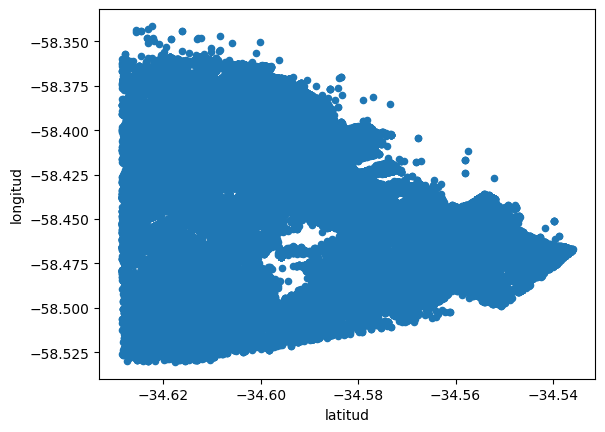

In [127]:
housing7[housing7.place_l2 == "Capital Federal"][housing7.latitud < -34.4 ].plot(kind="scatter", x="latitud", y="longitud")